In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [ ]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

In [3]:
# Load data
train = pd.read_csv("training_data.csv")
test_classify = pd.read_csv("songs_to_classify.csv")

In [4]:
df = pd.read_csv('training_data.csv')
# select which features to use

X = df.drop(columns=['label'])
y = df.loc[:,'label'].values

features = ['danceability','acousticness', 'instrumentalness', 'energy', 'valence',
            'loudness', 'liveness', 'speechiness', 'tempo', 'duration']
features_cat = ['time_signature', 'key', 'mode']

# Scaling the dataset to ensure more accurate results
from sklearn.preprocessing import StandardScaler
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, features_cat),
    ('standard-scaler', numerical_preprocessor, features)])

In [10]:
# Split into dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training rate

In [11]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0))])
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.745
Accuracy score (validation): 0.733
Learning rate:  0.1
Accuracy score (training): 0.820
Accuracy score (validation): 0.813
Learning rate:  0.25
Accuracy score (training): 0.857
Accuracy score (validation): 0.820
Learning rate:  0.5
Accuracy score (training): 0.852
Accuracy score (validation): 0.787
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.833
Learning rate:  1
Accuracy score (training): 0.878
Accuracy score (validation): 0.820


n_estimator

In [12]:
estimators = [5, 10, 20, 25, 30]
for estimator in estimators:
    gb =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators= estimator, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0))])
    gb.fit(X_train, y_train)
    print("n_estimator: ", estimator)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

n_estimator:  5
Accuracy score (training): 0.820
Accuracy score (validation): 0.767
n_estimator:  10
Accuracy score (training): 0.857
Accuracy score (validation): 0.800
n_estimator:  20
Accuracy score (training): 0.875
Accuracy score (validation): 0.833
n_estimator:  25
Accuracy score (training): 0.888
Accuracy score (validation): 0.820
n_estimator:  30
Accuracy score (training): 0.887
Accuracy score (validation): 0.807


The number of features to consider when looking for the best split.

In [15]:
feature = [5, 6, 7, 8, 9, 10, 11, 12, 13]
for f in feature:
    gb =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.75, max_features=f, max_depth = 2, random_state = 0))])
    gb.fit(X_train, y_train)
    print("max_features: ", f)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

max_features:  5
Accuracy score (training): 0.913
Accuracy score (validation): 0.827
max_features:  6
Accuracy score (training): 0.912
Accuracy score (validation): 0.800
max_features:  7
Accuracy score (training): 0.922
Accuracy score (validation): 0.793
max_features:  8
Accuracy score (training): 0.913
Accuracy score (validation): 0.767
max_features:  9
Accuracy score (training): 0.920
Accuracy score (validation): 0.827
max_features:  10
Accuracy score (training): 0.930
Accuracy score (validation): 0.793
max_features:  11
Accuracy score (training): 0.927
Accuracy score (validation): 0.780
max_features:  12
Accuracy score (training): 0.932
Accuracy score (validation): 0.800
max_features:  13
Accuracy score (training): 0.928
Accuracy score (validation): 0.833


In [16]:
depth = [1, 2, 3, 4]
for d in depth:
    gb =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.75, max_features=13, max_depth = d, random_state = 0))])
    gb.fit(X_train, y_train)
    print("max_depth: ", d)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

max_depth:  1
Accuracy score (training): 0.865
Accuracy score (validation): 0.780
max_depth:  2
Accuracy score (training): 0.928
Accuracy score (validation): 0.833
max_depth:  3
Accuracy score (training): 0.980
Accuracy score (validation): 0.800
max_depth:  4
Accuracy score (training): 1.000
Accuracy score (validation): 0.793


In [ ]:
sns.pairplot(df, vars = features, hue = 'label')

In [44]:
clf =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.75, max_features=13, max_depth = 2, random_state = 0))])

In [52]:
# Calculate accuracy: Evaluate the models using cross-validation
# Make Predictions on Test Data and compare with truth
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = clf.score(X_test, np.ravel(y_test))
print('Test score (Validation): ', '{0:.4f}'.format(score*100))

80.93 accuracy with a standard deviation of 0.06
Test score (Validation):  83.3333


In [51]:
clf.fit(X_train,np.ravel(y_train))
print('Training score (training): ', clf.score(X_train,np.ravel(y_train)))
print('Accuracy score (validation): ', clf.score(X_test,np.ravel(y_test)))

Training score (training):  0.9283333333333333
Accuracy score (validation):  0.8333333333333334


In [47]:
y_pred = clf.predict(X_test)

In [48]:
score_test = clf.score(X_test, y_test)
print('Test score: ', score_test )

Test score:  0.8333333333333334


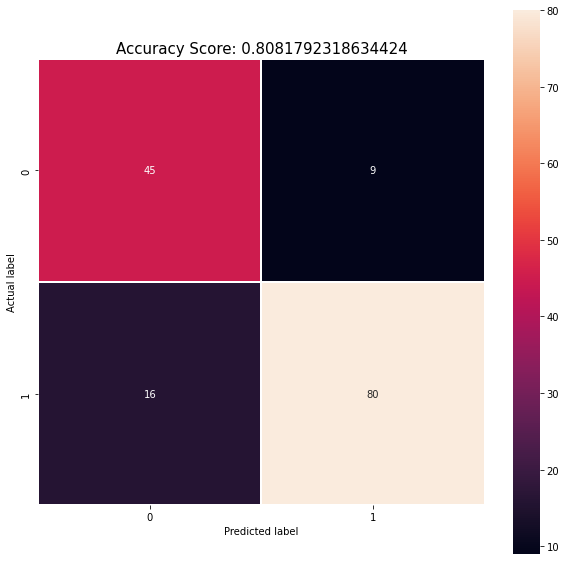

In [49]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score.mean()), size = 15);

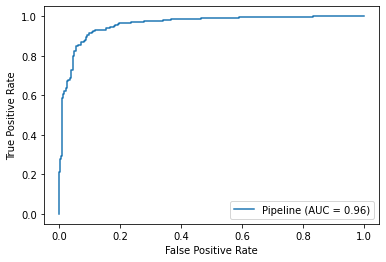

In [50]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X, y)

In [36]:
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.75, max_features=13, max_depth = 2, random_state = 0)

In [38]:
gb.fit(X_train,np.ravel(y_train))
print('Training score: ', clf.score(X_train,np.ravel(y_train)))
print('Test score: ', clf.score(X_test,np.ravel(y_test)))

Training score:  0.9283333333333333
Test score:  0.8333333333333334


In [39]:
gb.feature_importances_

array([0.14184374, 0.05687777, 0.03341802, 0.07174409, 0.01723717,
       0.00620924, 0.01583033, 0.14375749, 0.        , 0.43876886,
       0.05036365, 0.00391431, 0.02003534])

<BarContainer object of 13 artists>

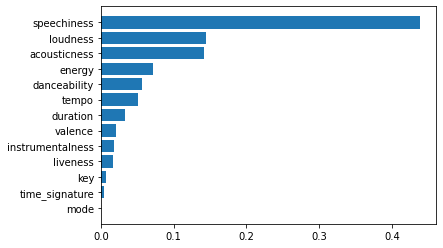

In [40]:
sorted_idx = gb.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], gb.feature_importances_[sorted_idx])

In [26]:
final_y = clf.predict(test_classify)

In [27]:
final =''.join(str(final_y).split(' ,')).replace(" ", "").replace('\n', "")
final

'[00010011001101101011001100001110111011110001010110001101100011001110100111010110111101110010111011111010010111110110101001111100101011111111101010000010001111101101101111111000011010111110100010100111]'

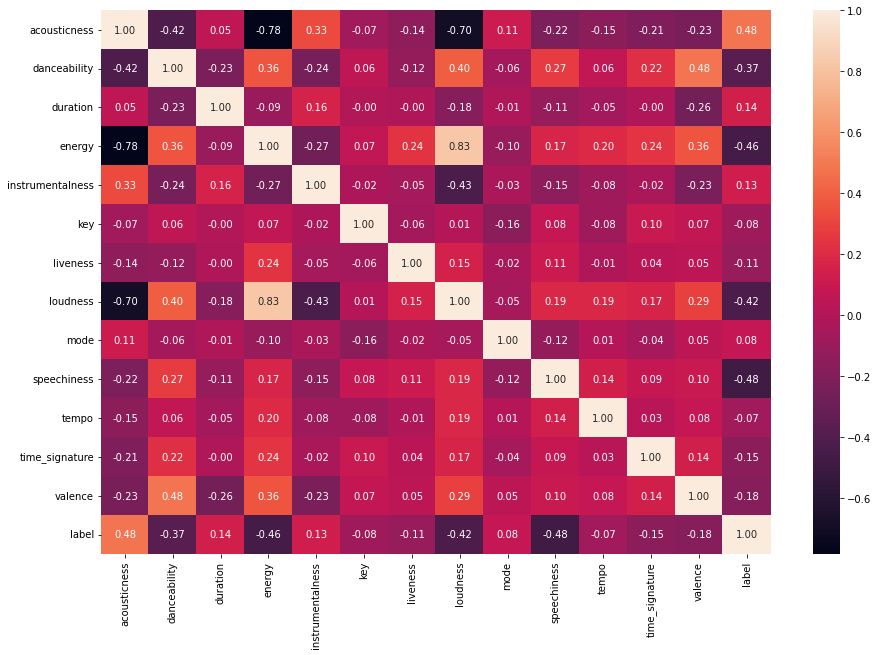

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, fmt=".2f")
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
plt.show()
plt.savefig('correlation_map')